Dataset

Code dibawah untuk mengimpor modul yang diperlukan untuk mengakses Google Drive di Google Colab, mount Google Drive ke Colab, mengimpor Pandas untuk memanipulasi data, dan membaca data saham dari file CSV yang disimpan di Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
dataset = pd.read_csv(r"/content/drive/MyDrive/Machine Learning/Stock_TLKM_2005-2024.csv")
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-26,965.0,975.0,965.0,970.0,548.346130,84725000.0
1,2005-01-27,970.0,970.0,960.0,960.0,542.692932,134222500.0
2,2005-01-28,965.0,965.0,955.0,960.0,542.692932,100760000.0
3,2005-01-31,960.0,965.0,950.0,960.0,542.692932,137322500.0
4,2005-02-01,965.0,975.0,960.0,965.0,545.519531,69960000.0
...,...,...,...,...,...,...,...
4700,2024-01-24,3950.0,3980.0,3930.0,3970.0,3970.000000,38732000.0
4701,2024-01-25,3980.0,4000.0,3960.0,3980.0,3980.000000,58541300.0
4702,2024-01-26,3940.0,3990.0,3930.0,3980.0,3980.000000,65272600.0
4703,2024-01-29,4000.0,4010.0,3970.0,4010.0,4010.000000,59150000.0


EDA

Code dibawah memberikan ringkasan informasi tentang dataset, termasuk jumlah entri, jumlah kolom, tipe data, dan jumlah nilai non-null di setiap kolom. Ini membantu Anda memahami struktur dataset secara umum.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4705 non-null   object 
 1   Open       4704 non-null   float64
 2   High       4704 non-null   float64
 3   Low        4704 non-null   float64
 4   Close      4704 non-null   float64
 5   Adj Close  4704 non-null   float64
 6   Volume     4704 non-null   float64
dtypes: float64(6), object(1)
memory usage: 257.4+ KB


Code untuk mengidentifikasi nilai-nilai yang hilang (NaN) di dataset, menghasilkan DataFrame yang berisi nilai boolean yang menunjukkan apakah suatu nilai adalah NaN atau tidak. Kemudian, metode sum() digunakan untuk menghitung jumlah nilai NaN di setiap kolom. Ini memberikan ringkasan tentang seberapa banyak nilai yang hilang dalam dataset Anda.

In [ ]:
dataset.isna().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

Code dibawah ini mencari baris di dataset di mana nilai kolom 'Volume' adalah NaN. Ini dilakukan dengan membuat mask boolean menggunakan dataset['Volume'].isna() dan kemudian memilih baris yang memenuhi kondisi tersebut dengan menggunakan mask tersebut sebagai indeks. Hasilnya adalah subset dataset yang hanya berisi baris di mana nilai kolom 'Volume' adalah NaN.

In [ ]:
nan_rows = dataset[dataset['Volume'].isna()]
print(nan_rows)

            Date  Open  High  Low  Close  Adj Close  Volume
3573  2019-06-19   NaN   NaN  NaN    NaN        NaN     NaN


Code dibawah menghapus semua baris yang mengandung nilai NaN dari dataset. Pengaturan inplace=True mengakibatkan penghapusan dilakukan pada dataset itu sendiri, tanpa perlu menyimpan hasilnya ke variabel baru. Ini adalah langkah yang umum dilakukan dalam pengelolaan nilai-nilai yang hilang sebelum melakukan analisis lebih lanjut.

In [ ]:
dataset.dropna(inplace=True)

Code dibawah ini untuk mencetak daftar kolom dalam dataset. Ini membantu Anda memahami apa saja kolom yang ada dalam dataset Anda.

In [ ]:
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Pada code ini kolom yang dipakai adalah date dan adj close. Dimana nilai nan yang ada akan diganti menggunakan metode Forward Fill

In [ ]:
dataset1 = dataset[['Date','Adj Close']].copy(deep=True)
dataset1['Date'] = pd.to_datetime(dataset1['Date'])
dataset1.set_index('Date',inplace = True)
dataset1.rename(columns={'Adj Close': 'Price'}, inplace=True)
dataset1 = dataset1.resample('W').mean()
dataset1.ffill(inplace=True)

In [ ]:
# Check for missing values
dataset1.isna().sum()

Price    0
dtype: int64

Mmeriksa apakah ada kolom yang memiliki nilai tak terhingga?

In [ ]:
import numpy as np
# Check for infinite values
inf_values = dataset1.isin([np.inf, -np.inf])

# Check if any value is infinite in the DataFrame
if inf_values.any().any():
    print("DataFrame contains infinite values.")
    print("Locations of infinite values:")
    print(inf_values)
else:
    print("DataFrame does not contain infinite values.")

DataFrame does not contain infinite values.


Memberikan warna berbeda pada setiap nilai (diambil sample 10 teratas) untuk melihat adanya berpedaan nilai pada setiap barisnya.

In [ ]:
dataset1[:10].style.background_gradient(cmap='viridis')

,Price
Date,
2005-01-30 00:00:00,544.577331
2005-02-06 00:00:00,537.039978
2005-02-13 00:00:00,525.733826
2005-02-20 00:00:00,532.517615
2005-02-27 00:00:00,519.515509
2005-03-06 00:00:00,506.513513
2005-03-13 00:00:00,504.534958
2005-03-20 00:00:00,494.642084
2005-03-27 00:00:00,516.547615


In [ ]:
from scipy.stats import linregress
window_size = 30
ma = dataset1['Price'].rolling(window=window_size).mean()
mstd = dataset1['Price'].rolling(window=window_size).std()
slope, intercept, _, _, _ = linregress(np.arange(len(dataset1)), dataset1['Price'])

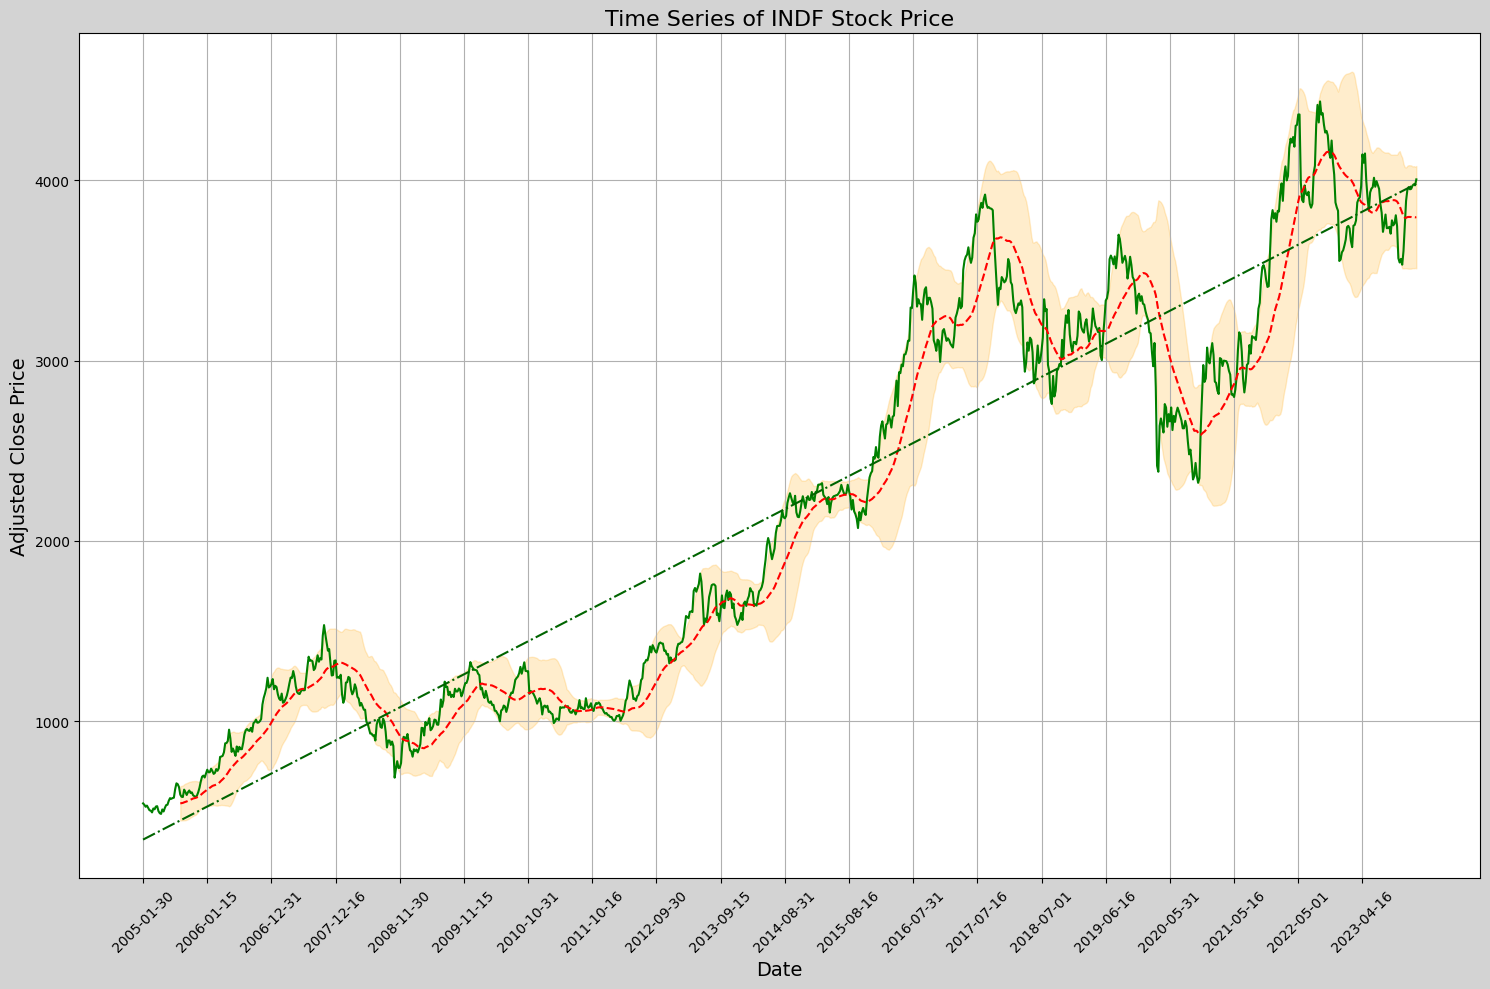

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10), facecolor='lightgrey')
plt.plot(dataset1.index, dataset1['Price'], color='green')
plt.plot(dataset1.index, ma, label=f'{window_size}-day MA', linestyle='--', color='red')
plt.fill_between(dataset1.index, ma - 2 * mstd, ma + 2 * mstd, alpha=0.2, label=f'{window_size}-day MSTD', color='orange')
plt.plot(dataset1.index, intercept + slope * np.arange(len(dataset1)), label='Linear Fit', linestyle='-.', color='darkgreen')

n = 50
plt.xticks(dataset1.index[::n])
plt.xticks(rotation=45)

plt.title("Time Series of INDF Stock Price", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Adjusted Close Price", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window=30).mean()
    MSTD = timeseries.rolling(window=30).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,8))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

def tsplot(y, lags=None, figsize=(15, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

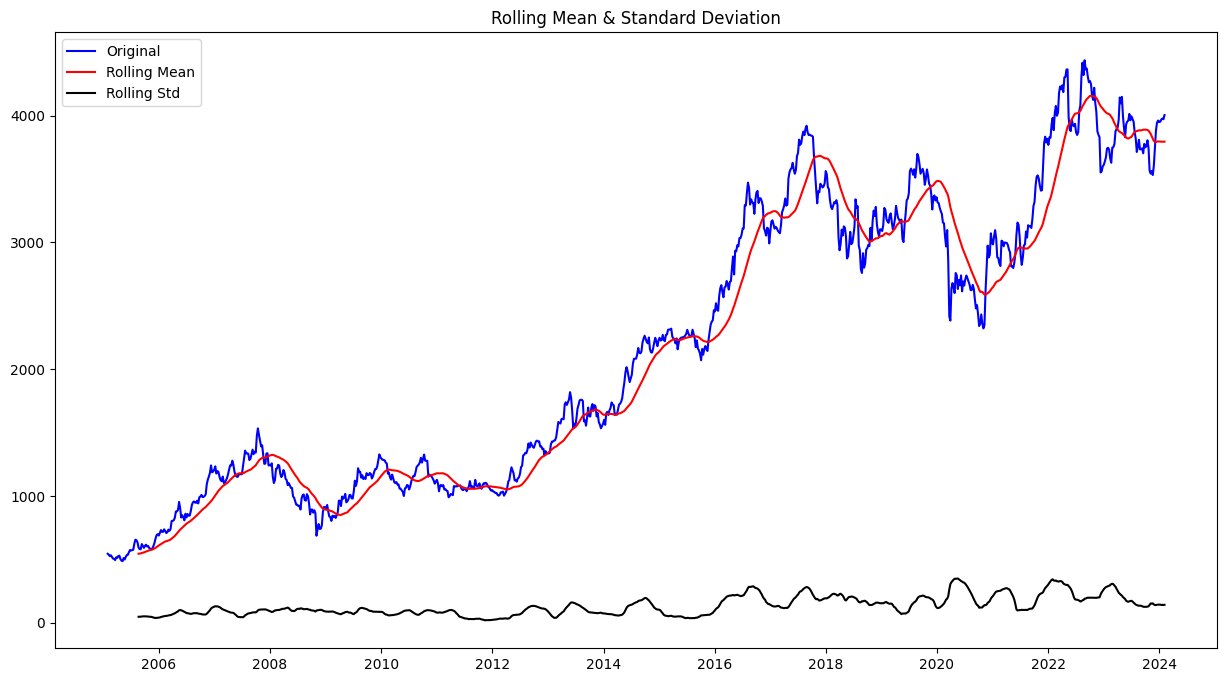

Results of Dickey-Fuller Test:
Test Statistic                  -0.810199
p-value                          0.816108
#Lags Used                       7.000000
Number of Observations Used    985.000000
Critical Value (1%)             -3.437006
Critical Value (5%)             -2.864479
Critical Value (10%)            -2.568335
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller

test_stationarity(dataset1['Price'])

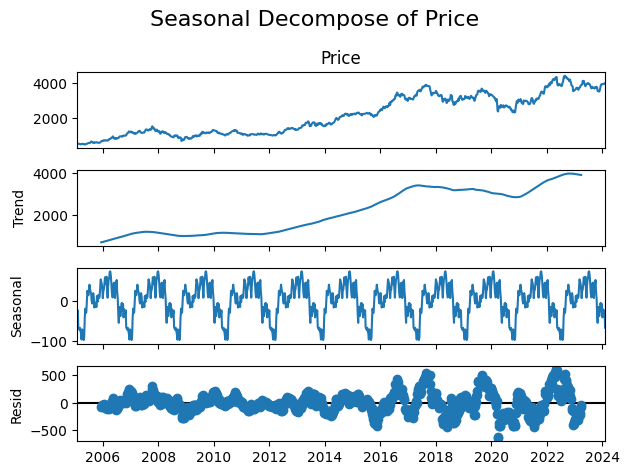

In [ ]:
import statsmodels.api as sm

dec = sm.tsa.seasonal_decompose(dataset1['Price'], period=90).plot()

plt.suptitle('Seasonal Decompose of Price', fontsize=16)
plt.tight_layout()
plt.show()

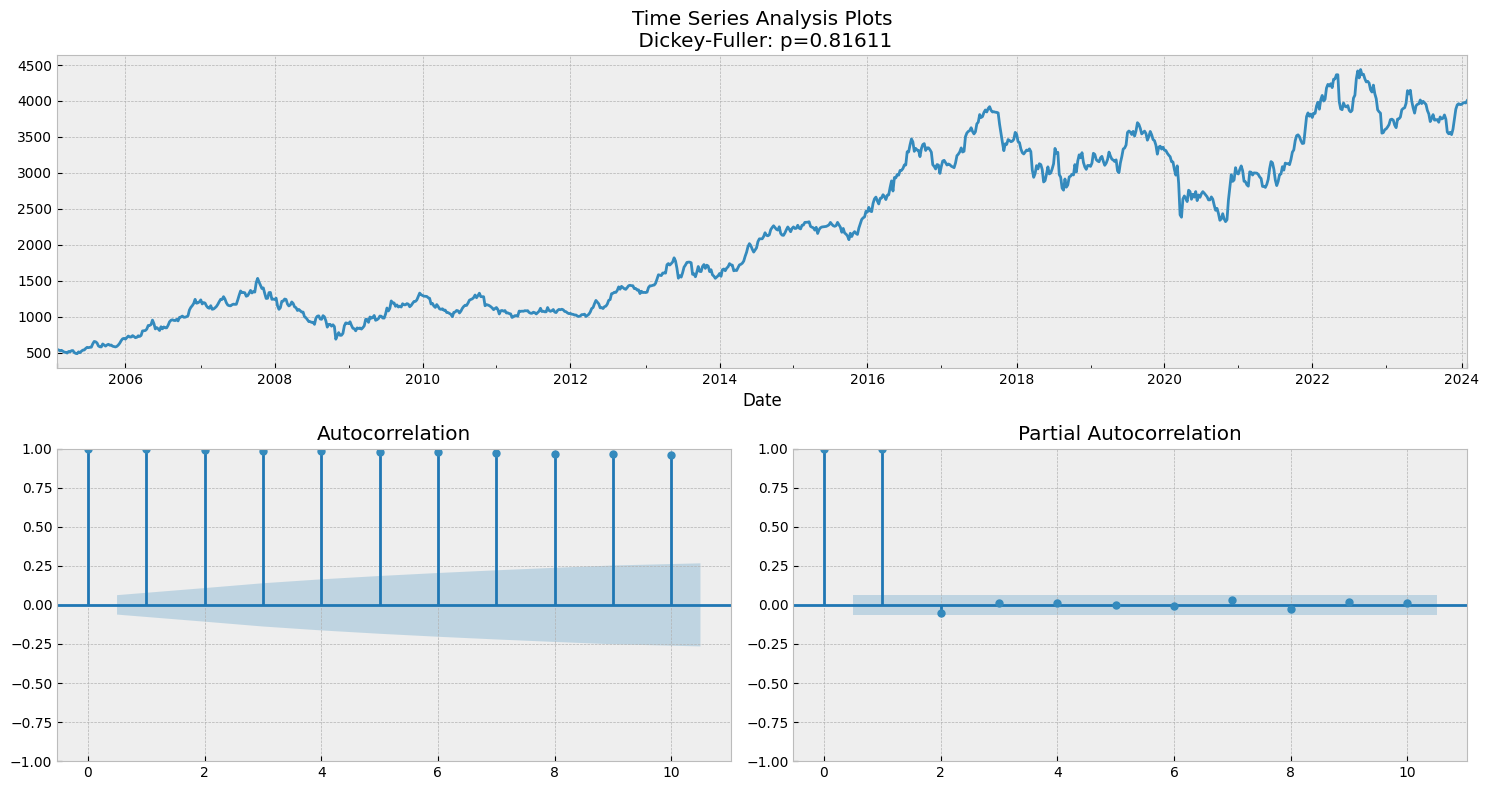

In [ ]:
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots
import matplotlib.pyplot as plt

def tsplot(y, lags=None, figsize=(15, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
        tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

tsplot(dataset1['Price'], lags=10)


In [ ]:
dataset2 = dataset1.copy()
dataset2

,Price
Date,
2005-01-30,544.577331
2005-02-06,537.039978
2005-02-13,525.733826
2005-02-20,532.517615
2005-02-27,519.515509
...,...
2024-01-07,3952.500000
2024-01-14,3970.000000
2024-01-21,3978.000000


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

dataset2['Price_Diff'] = dataset2['Price'].diff()
dataset2['Price_Log'] = np.log(dataset2['Price'])
dataset2['Price_Detrended'] = dataset2['Price'] - dataset2['Price'].rolling(window=30).mean()
result_sd = seasonal_decompose(dataset2['Price'], model='multiplicative', period=52)
dataset2['Price_Seasonal_Adjusted'] = dataset2['Price'] - result_sd.seasonal
window_size = 30
dataset2['Price_Rolling_Mean'] = dataset2['Price'].rolling(window=window_size).mean()
dataset2['Price_Rolling_Std'] = dataset2['Price'].rolling(window=window_size).std()
dataset2.head()

,Price,Price_Diff,Price_Log,Price_Detrended,Price_Seasonal_Adjusted,Price_Rolling_Mean,Price_Rolling_Std
Date,,,,,,,
2005-01-30,544.577331,NaN,6.300010,NaN,543.585401,NaN,NaN
2005-02-06,537.039978,-7.537353,6.286073,NaN,536.045910,NaN,NaN
2005-02-13,525.733826,-11.306152,6.264795,NaN,524.743992,NaN,NaN
2005-02-20,532.517615,6.783789,6.277616,NaN,531.534389,NaN,NaN
2005-02-27,519.515509,-13.002106,6.252897,NaN,518.533554,NaN,NaN


In [ ]:
dataset2.isna().sum()


Price                       0
Price_Diff                  1
Price_Log                   0
Price_Detrended            29
Price_Seasonal_Adjusted     0
Price_Rolling_Mean         29
Price_Rolling_Std          29
dtype: int64

In [ ]:
dataset2.dropna(inplace=True)
dataset2.head()

,Price,Price_Diff,Price_Log,Price_Detrended,Price_Seasonal_Adjusted,Price_Rolling_Mean,Price_Rolling_Std
Date,,,,,,,
2005-08-21,592.977768,-41.857278,6.385157,48.263516,591.948894,544.714252,47.407451
2005-08-28,581.350708,-11.627060,6.365354,35.410676,580.324284,545.940032,47.876875
2005-09-04,579.897354,-1.453354,6.362851,32.528743,578.872001,547.368611,48.240176
2005-09-11,620.882605,40.985251,6.431142,70.342368,619.854232,550.540237,49.869067
2005-09-18,606.930164,-13.952441,6.408414,53.909509,605.902538,553.020655,50.783932


In [ ]:
print(dataset1)
print(dataset2)

                  Price
Date                   
2005-01-30   544.577331
2005-02-06   537.039978
2005-02-13   525.733826
2005-02-20   532.517615
2005-02-27   519.515509
...                 ...
2024-01-07  3952.500000
2024-01-14  3970.000000
2024-01-21  3978.000000
2024-01-28  3972.000000
2024-02-04  4005.000000

[993 rows x 1 columns]
                  Price  Price_Diff  Price_Log  Price_Detrended  \
Date                                                              
2005-08-21   592.977768  -41.857278   6.385157        48.263516   
2005-08-28   581.350708  -11.627060   6.365354        35.410676   
2005-09-04   579.897354   -1.453354   6.362851        32.528743   
2005-09-11   620.882605   40.985251   6.431142        70.342368   
2005-09-18   606.930164  -13.952441   6.408414        53.909509   
...                 ...         ...        ...              ...   
2024-01-07  3952.500000    2.500000   8.282104       156.200000   
2024-01-14  3970.000000   17.500000   8.286521       175.1666

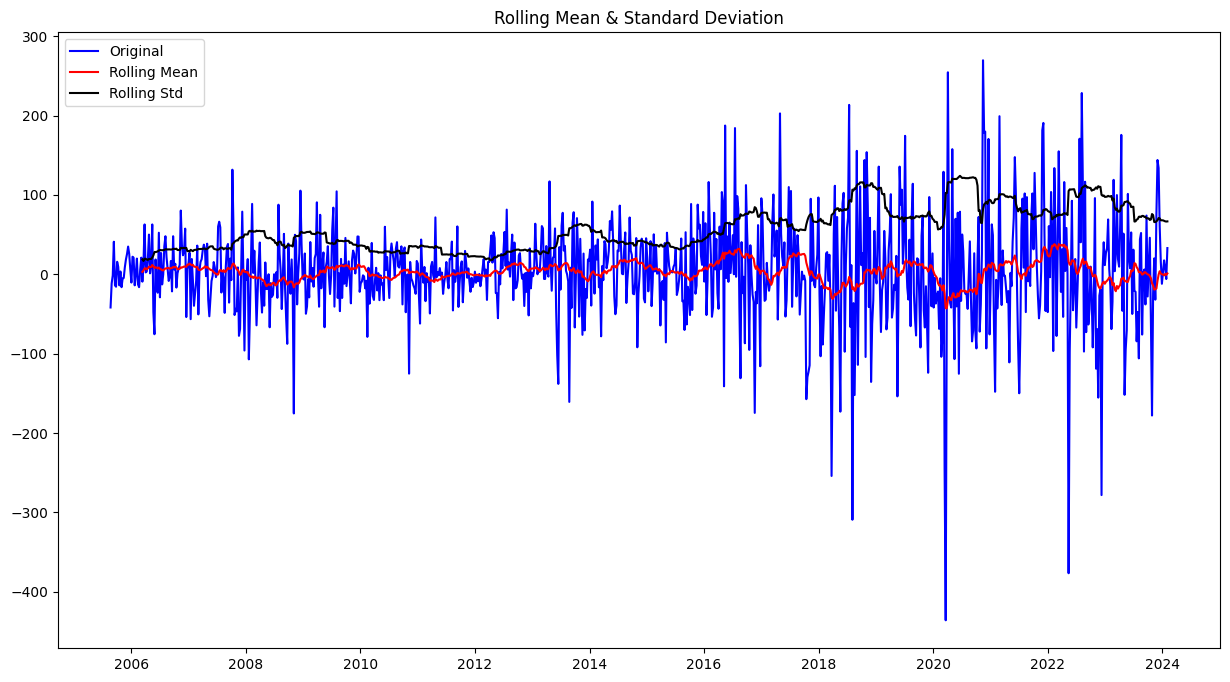

Results of Dickey-Fuller Test:
Test Statistic                -1.156204e+01
p-value                        3.252605e-21
#Lags Used                     6.000000e+00
Number of Observations Used    9.570000e+02
Critical Value (1%)           -3.437202e+00
Critical Value (5%)           -2.864565e+00
Critical Value (10%)          -2.568381e+00
dtype: float64


In [ ]:
test_stationarity(dataset2['Price_Diff'])

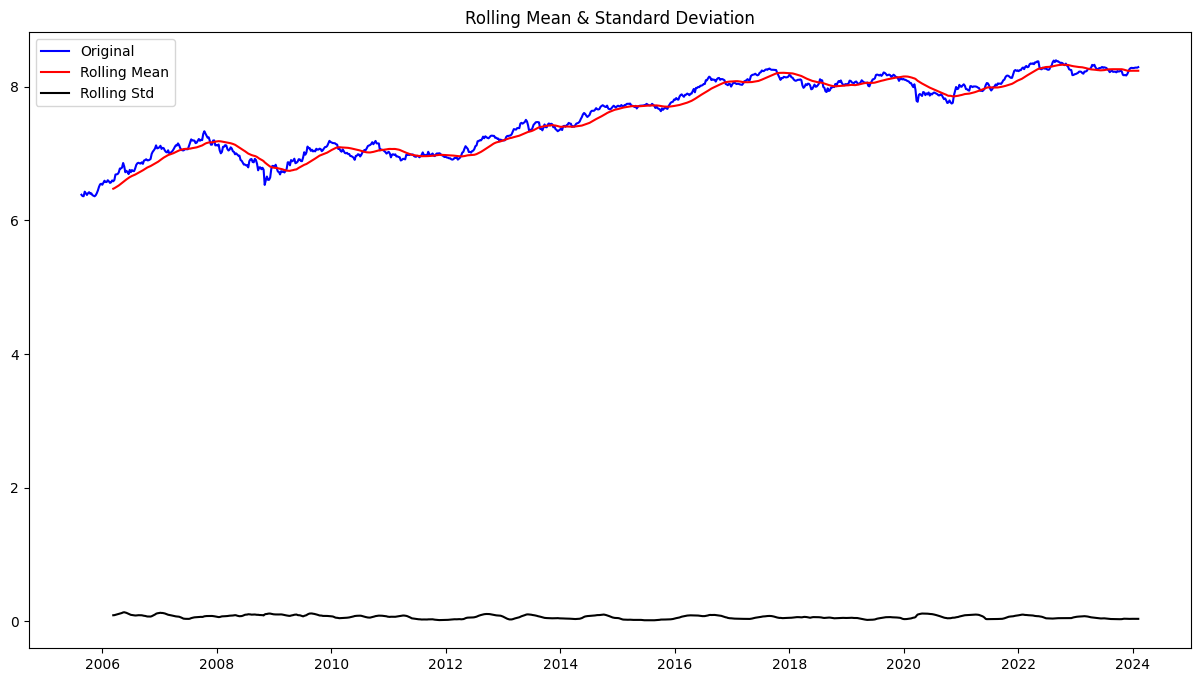

Results of Dickey-Fuller Test:
Test Statistic                  -1.718913
p-value                          0.421395
#Lags Used                       2.000000
Number of Observations Used    961.000000
Critical Value (1%)             -3.437173
Critical Value (5%)             -2.864552
Critical Value (10%)            -2.568374
dtype: float64


In [ ]:
test_stationarity(dataset2['Price_Log'])

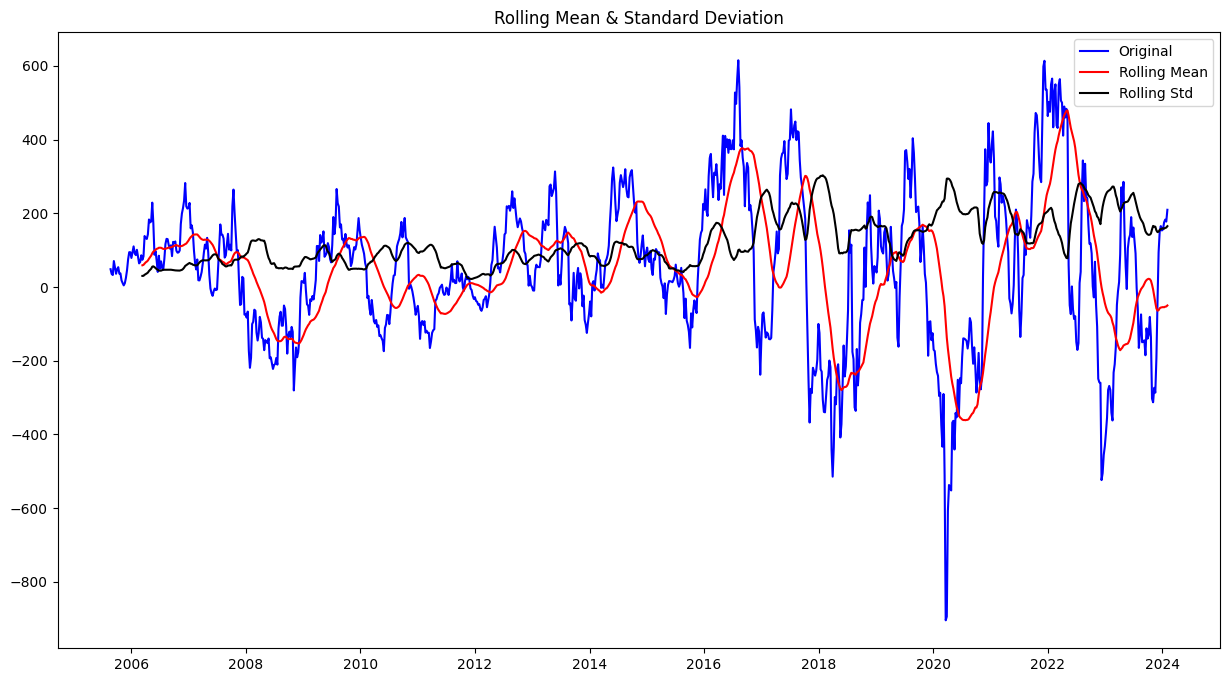

Results of Dickey-Fuller Test:
Test Statistic                  -5.405478
p-value                          0.000003
#Lags Used                       7.000000
Number of Observations Used    956.000000
Critical Value (1%)             -3.437209
Critical Value (5%)             -2.864568
Critical Value (10%)            -2.568382
dtype: float64


In [ ]:
test_stationarity(dataset2['Price_Detrended'])

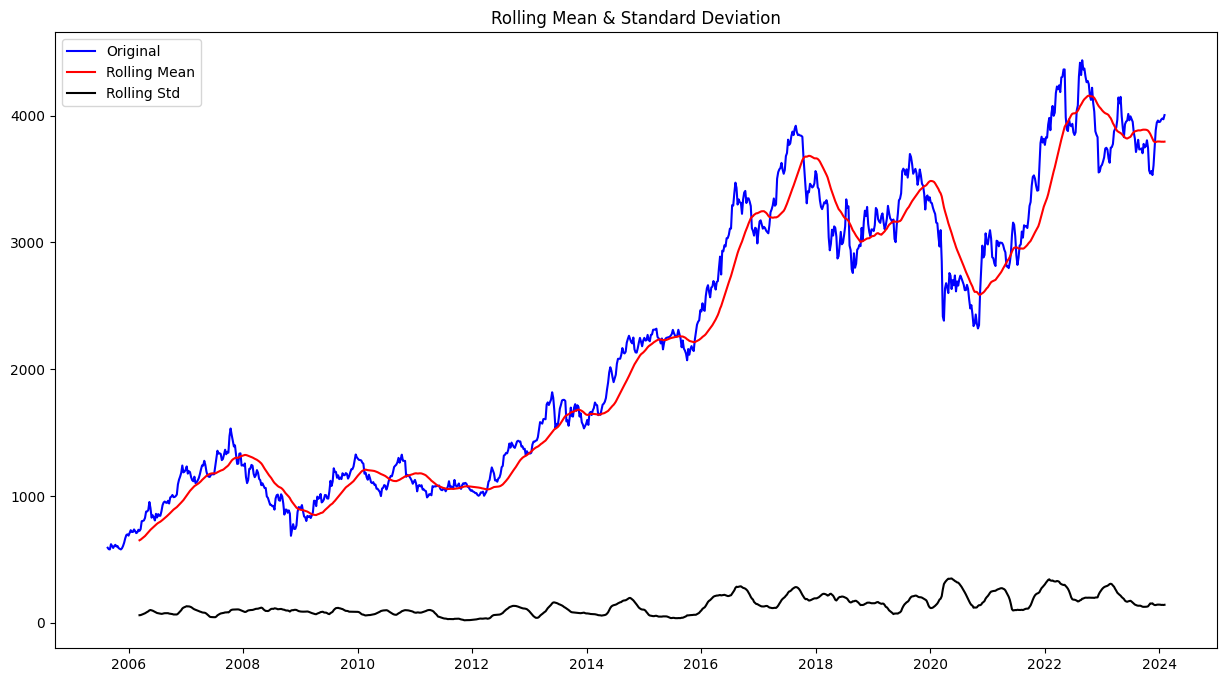

Results of Dickey-Fuller Test:
Test Statistic                  -0.810065
p-value                          0.816148
#Lags Used                       7.000000
Number of Observations Used    956.000000
Critical Value (1%)             -3.437209
Critical Value (5%)             -2.864568
Critical Value (10%)            -2.568382
dtype: float64


In [ ]:
test_stationarity(dataset2['Price_Seasonal_Adjusted'])

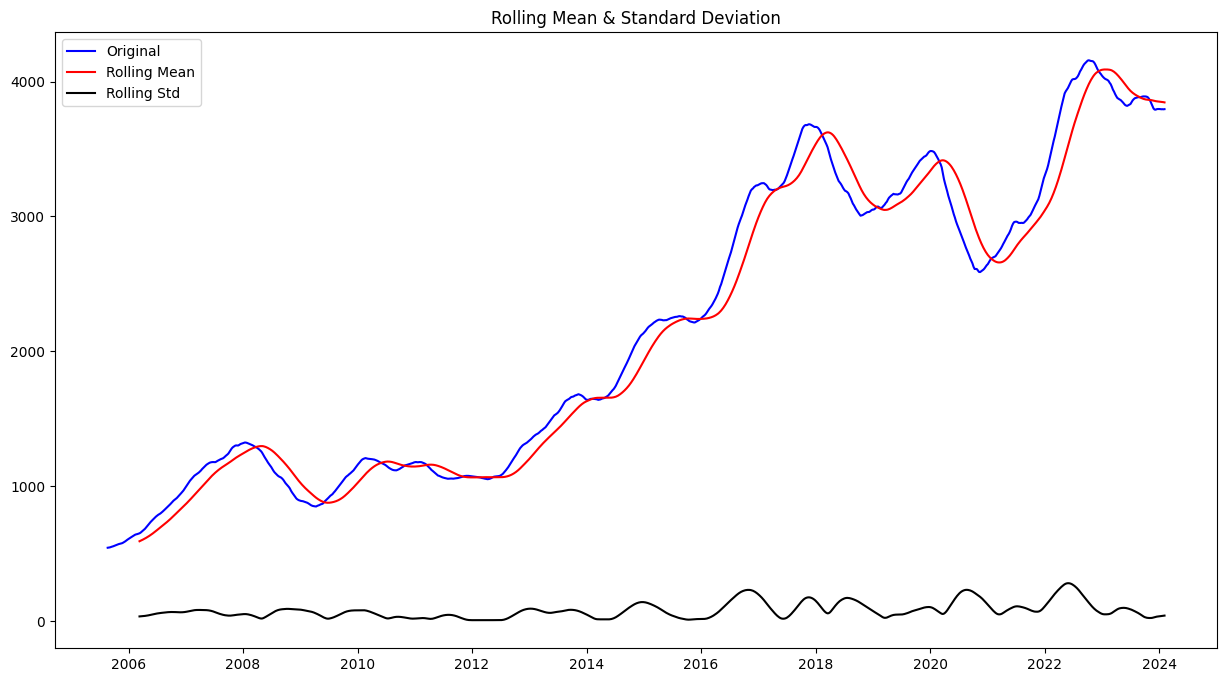

Results of Dickey-Fuller Test:
Test Statistic                  -0.760423
p-value                          0.830472
#Lags Used                      20.000000
Number of Observations Used    943.000000
Critical Value (1%)             -3.437304
Critical Value (5%)             -2.864610
Critical Value (10%)            -2.568405
dtype: float64


In [ ]:
test_stationarity(dataset2['Price_Rolling_Mean'])

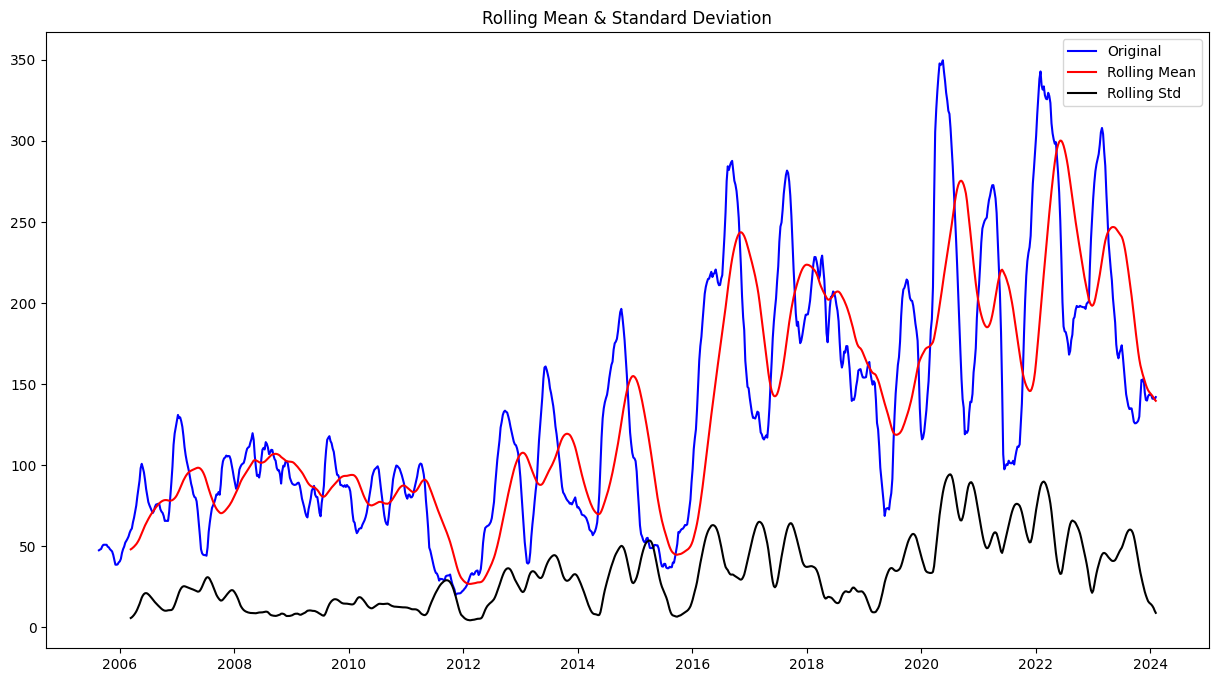

Results of Dickey-Fuller Test:
Test Statistic                  -4.369410
p-value                          0.000336
#Lags Used                       8.000000
Number of Observations Used    955.000000
Critical Value (1%)             -3.437216
Critical Value (5%)             -2.864571
Critical Value (10%)            -2.568384
dtype: float64


In [ ]:
test_stationarity(dataset2['Price_Rolling_Std'])

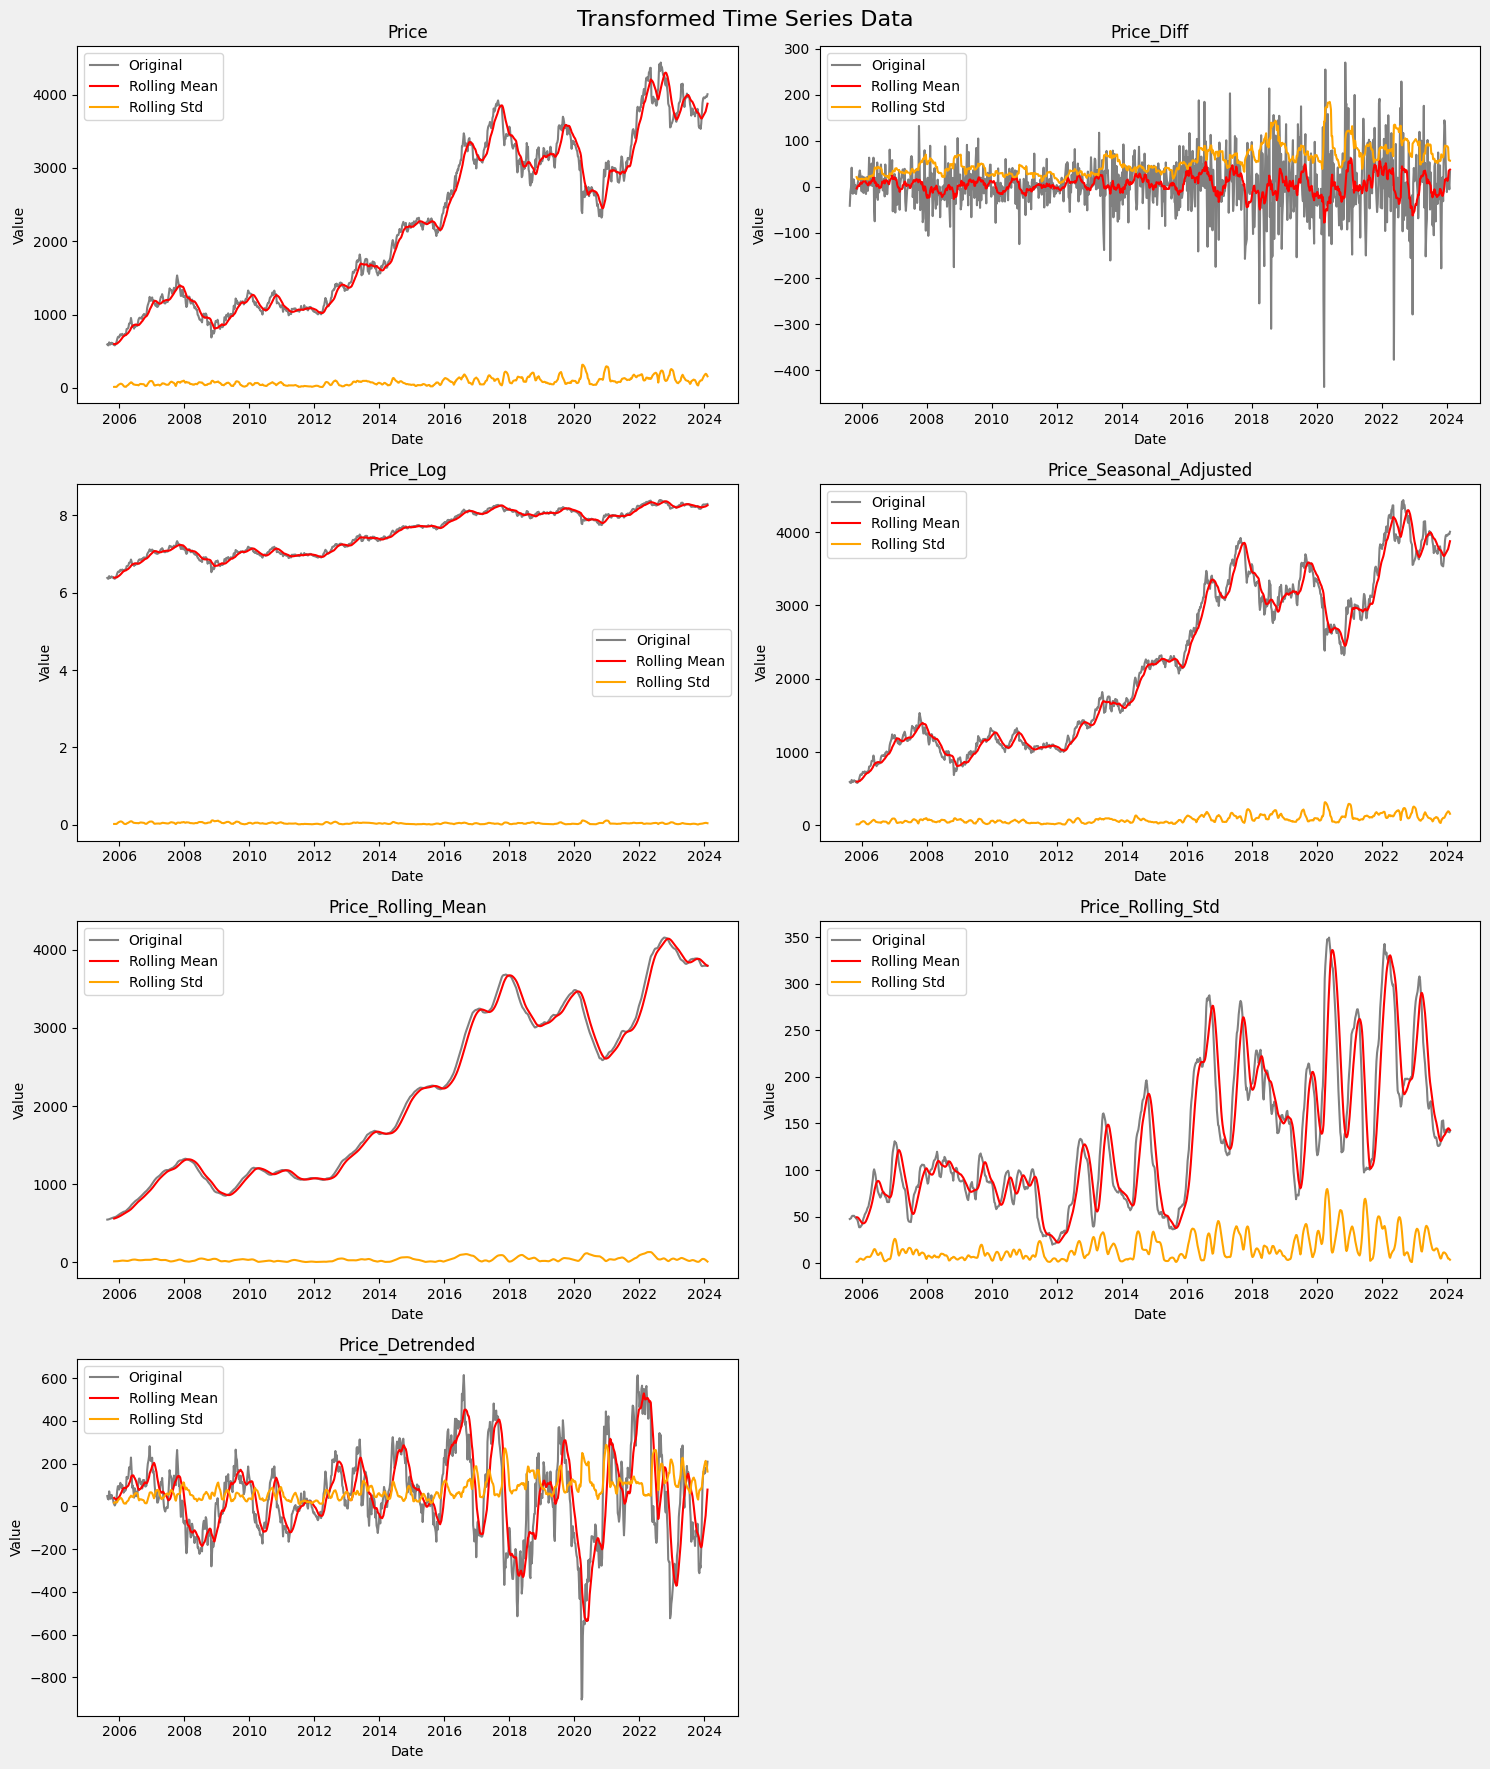

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15, 18), facecolor='#f0f0f0')

# Flatten the axes
axes = axes.flatten()

# List of columns to plot
columns_to_plot = ['Price', 'Price_Diff', 'Price_Log', 'Price_Seasonal_Adjusted', 'Price_Rolling_Mean', 'Price_Rolling_Std', 'Price_Detrended']

# Plot each column
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    ax.plot(dataset2.index, dataset2[col], label='Original', color='grey')

    # Calculate rolling statistics
    MA = dataset2[col].rolling(window=12).mean()
    MSTD = dataset2[col].rolling(window=12).std()

    ax.plot(dataset2.index, MA, color='red', label='Rolling Mean')
    ax.plot(dataset2.index, MSTD, color='orange', label='Rolling Std')

    ax.set_title(col)
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()

# Hide any unused subplots
for i in range(len(columns_to_plot), 4 * 2):
    fig.delaxes(axes[i])

plt.suptitle("Transformed Time Series Data", size=16)
plt.tight_layout()
plt.show()

Modelling


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


look_back = 90

train_data, test_data = train_test_split(dataset1, test_size=0.2, shuffle=False)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

X_train, Y_train = [], []
for i in range(len(scaled_train_data) - look_back):
    X_train.append(scaled_train_data[i:(i + look_back), 0])
    Y_train.append(scaled_train_data[i + look_back, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

X_test, Y_test = [], []
for i in range(len(scaled_test_data) - look_back):
    X_test.append(scaled_test_data[i:(i + look_back), 0])
    Y_test.append(scaled_test_data[i + look_back, 0])

X_test, Y_test = np.array(X_test), np.array(Y_test)

X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Jumlah data pada data train
train_data_count = len(X_train)
print("Jumlah data pada data train:", train_data_count)

# Jumlah data pada data test
test_data_count = len(X_test)
print("Jumlah data pada data test:", test_data_count)

Jumlah data pada data train: 704
Jumlah data pada data test: 109


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import time

# Random Forest
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
start_time = time.time()
rf_regressor.fit(X_train.reshape(-1, look_back), Y_train)
train_predictions_rf = rf_regressor.predict(X_train.reshape(-1, look_back))
test_predictions_rf = rf_regressor.predict(X_test.reshape(-1, look_back))
train_rmse_rf = np.sqrt(mean_squared_error(Y_train, train_predictions_rf))
test_rmse_rf = np.sqrt(mean_squared_error(Y_test, test_predictions_rf))
rf_time = time.time() - start_time

# Gradient Boosting
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
start_time = time.time()
gb_regressor.fit(X_train.reshape(-1, look_back), Y_train)
train_predictions_gb = gb_regressor.predict(X_train.reshape(-1, look_back))
test_predictions_gb = gb_regressor.predict(X_test.reshape(-1, look_back))
train_rmse_gb = np.sqrt(mean_squared_error(Y_train, train_predictions_gb))
test_rmse_gb = np.sqrt(mean_squared_error(Y_test, test_predictions_gb))
gb_time = time.time() - start_time

# Support Vector Regression
svr_regressor = SVR()
start_time = time.time()
svr_regressor.fit(X_train.reshape(-1, look_back), Y_train)
train_predictions_svr = svr_regressor.predict(X_train.reshape(-1, look_back))
test_predictions_svr = svr_regressor.predict(X_test.reshape(-1, look_back))
train_rmse_svr = np.sqrt(mean_squared_error(Y_train, train_predictions_svr))
test_rmse_svr = np.sqrt(mean_squared_error(Y_test, test_predictions_svr))
svr_time = time.time() - start_time


# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train.reshape(-1, look_back), Y_train)
train_predictions_linear = linear_regressor.predict(X_train.reshape(-1, look_back))
test_predictions_linear = linear_regressor.predict(X_test.reshape(-1, look_back))
train_rmse_linear = np.sqrt(mean_squared_error(Y_train, train_predictions_linear))
test_rmse_linear = np.sqrt(mean_squared_error(Y_test, test_predictions_linear))
lr_time = time.time() - start_time

# Print results
print("Random Forest:")
print("Train RMSE:", train_rmse_rf)
print("Test RMSE:", test_rmse_rf)
print("Time taken:", rf_time, "seconds")

print("\nGradient Boosting:")
print("Train RMSE:", train_rmse_gb)
print("Test RMSE:", test_rmse_gb)
print("Time taken:", gb_time, "seconds")

print("\nSupport Vector Regression:")
print("Train RMSE:", train_rmse_svr)
print("Test RMSE:", test_rmse_svr)
print("Time taken:", svr_time, "seconds")

print("\nLinear Regression:")
print("Train RMSE:", train_rmse_linear)
print("Test RMSE:", test_rmse_linear)
print("Time taken:", lr_time, "seconds")

Random Forest:
Train RMSE: 0.006767697737213172
Test RMSE: 0.08134751995059919
Time taken: 3.4459989070892334 seconds

Gradient Boosting:
Train RMSE: 0.008501191011640843
Test RMSE: 0.09702869746311005
Time taken: 2.3243675231933594 seconds

Support Vector Regression:
Train RMSE: 0.044525432601682416
Test RMSE: 0.25013803520388184
Time taken: 0.016315937042236328 seconds

Linear Regression:
Train RMSE: 0.015395558991859164
Test RMSE: 0.029396367965143597
Time taken: 0.08401727676391602 seconds


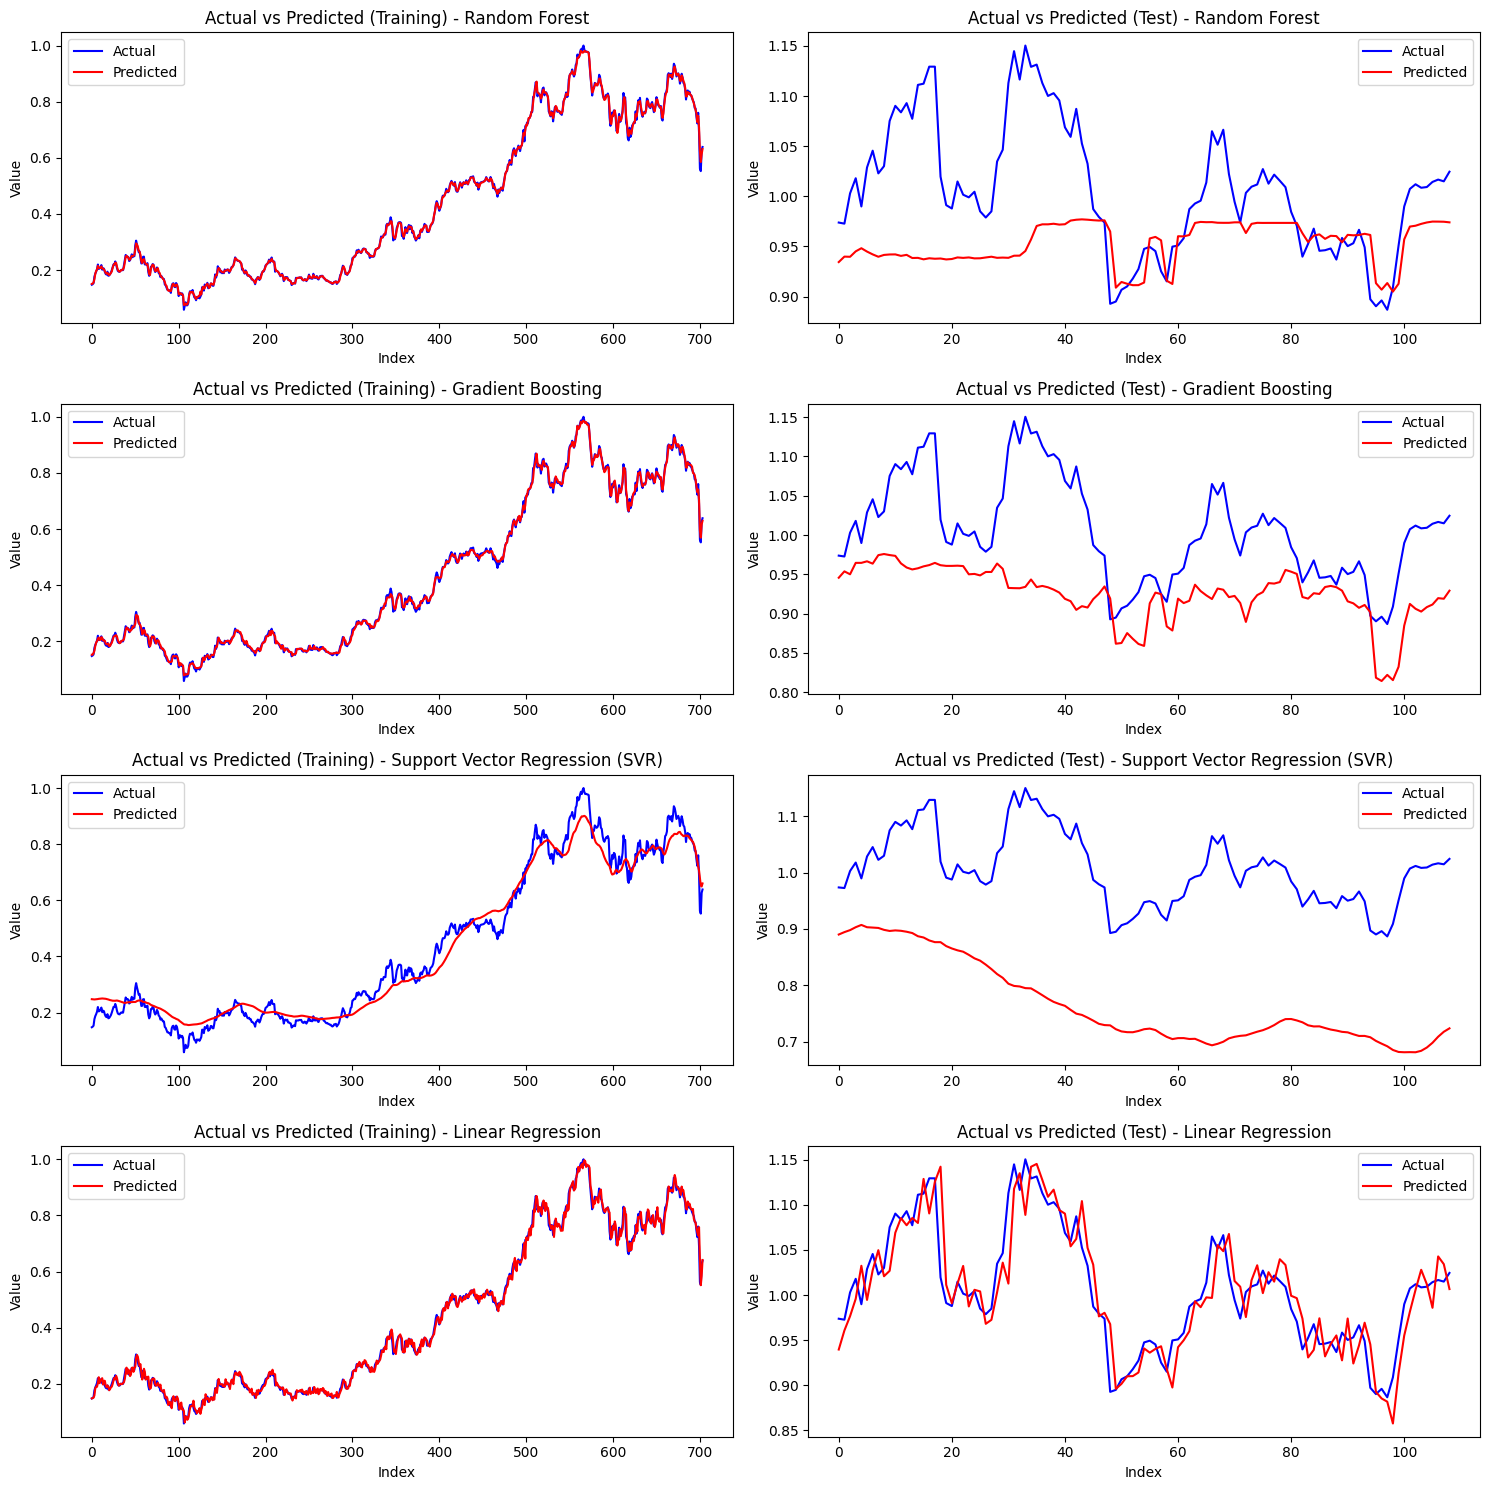

In [ ]:
plt.figure(figsize=(15, 15))

# Random Forest
plt.subplot(4, 2, 1)
plt.plot(Y_train, label='Actual', color='blue')
plt.plot(train_predictions_rf, label='Predicted', color='red')
plt.title('Actual vs Predicted (Training) - Random Forest')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(Y_test, label='Actual', color='blue')
plt.plot(test_predictions_rf, label='Predicted', color='red')
plt.title('Actual vs Predicted (Test) - Random Forest')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(Y_train, label='Actual', color='blue')
plt.plot(train_predictions_gb, label='Predicted', color='red')
plt.title('Actual vs Predicted (Training) - Gradient Boosting')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(Y_test, label='Actual', color='blue')
plt.plot(test_predictions_gb, label='Predicted', color='red')
plt.title('Actual vs Predicted (Test) - Gradient Boosting')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Support Vector Regression (SVR)
plt.subplot(4, 2, 5)
plt.plot(Y_train, label='Actual', color='blue')
plt.plot(train_predictions_svr, label='Predicted', color='red')
plt.title('Actual vs Predicted (Training) - Support Vector Regression (SVR)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

plt.subplot(4, 2, 6)
plt.plot(Y_test, label='Actual', color='blue')
plt.plot(test_predictions_svr, label='Predicted', color='red')
plt.title('Actual vs Predicted (Test) - Support Vector Regression (SVR)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Linear Regression
plt.subplot(4, 2, 7)
plt.plot(Y_train, label='Actual', color='blue')
plt.plot(train_predictions_linear, label='Predicted', color='red')
plt.title('Actual vs Predicted (Training) - Linear Regression')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

plt.subplot(4, 2, 8)
plt.plot(Y_test, label='Actual', color='blue')
plt.plot(test_predictions_linear, label='Predicted', color='red')
plt.title('Actual vs Predicted (Test) - Linear Regression')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


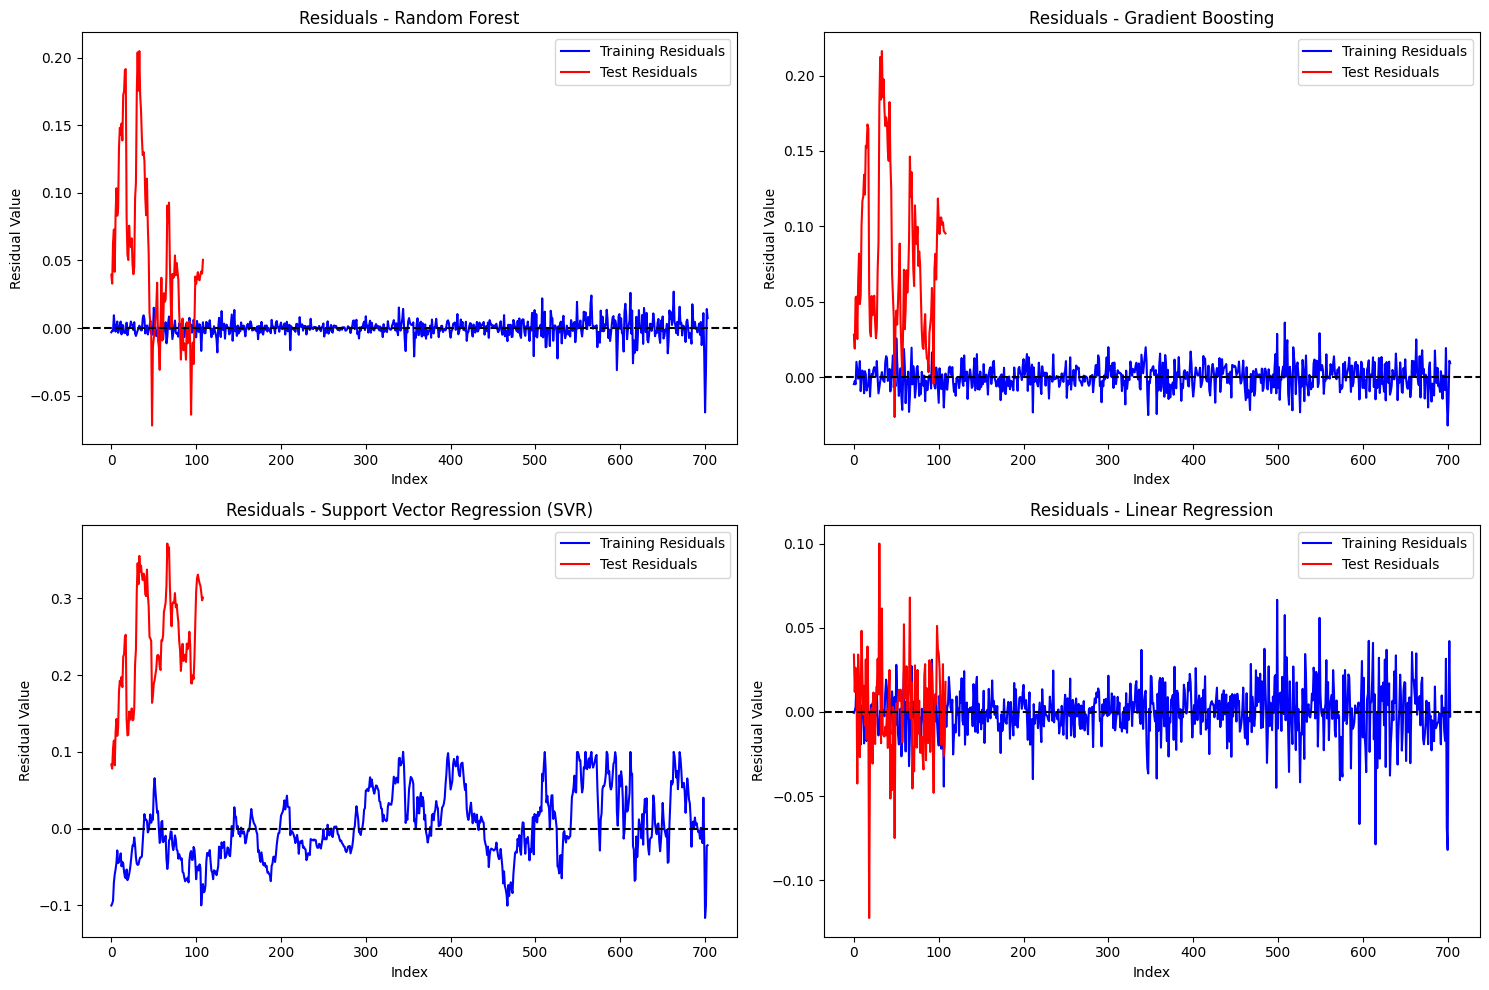

In [ ]:
# Hitung residu untuk model Random Forest
train_residuals_rf = Y_train - train_predictions_rf
test_residuals_rf = Y_test - test_predictions_rf

# Hitung residu untuk model Gradient Boosting
train_residuals_gb = Y_train - train_predictions_gb
test_residuals_gb = Y_test - test_predictions_gb

# Hitung residu untuk model Support Vector Regression (SVR)
train_residuals_svr = Y_train - train_predictions_svr
test_residuals_svr = Y_test - test_predictions_svr

# Hitung residu untuk model Linear Regression
train_residuals_linear = Y_train - train_predictions_linear
test_residuals_linear = Y_test - test_predictions_linear



plt.figure(figsize=(15, 10))


# Random Forest
plt.subplot(2, 2, 1)
plt.plot(train_residuals_rf, label='Training Residuals', color='blue')
plt.plot(test_residuals_rf, label='Test Residuals', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals - Random Forest')
plt.xlabel('Index')
plt.ylabel('Residual Value')
plt.legend()

# Gradient Boosting
plt.subplot(2, 2, 2)
plt.plot(train_residuals_gb, label='Training Residuals', color='blue')
plt.plot(test_residuals_gb, label='Test Residuals', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals - Gradient Boosting')
plt.xlabel('Index')
plt.ylabel('Residual Value')
plt.legend()

# Support Vector Regression (SVR)
plt.subplot(2, 2, 3)
plt.plot(train_residuals_svr, label='Training Residuals', color='blue')
plt.plot(test_residuals_svr, label='Test Residuals', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals - Support Vector Regression (SVR)')
plt.xlabel('Index')
plt.ylabel('Residual Value')
plt.legend()

# Linear Regression
plt.subplot(2, 2, 4)
plt.plot(train_residuals_linear, label='Training Residuals', color='blue')
plt.plot(test_residuals_linear, label='Test Residuals', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals - Linear Regression')
plt.xlabel('Index')
plt.ylabel('Residual Value')
plt.legend()

plt.tight_layout()
plt.show()


Evaluation

100%|██████████| 10/10 [00:00<00:00, 106.99it/s]


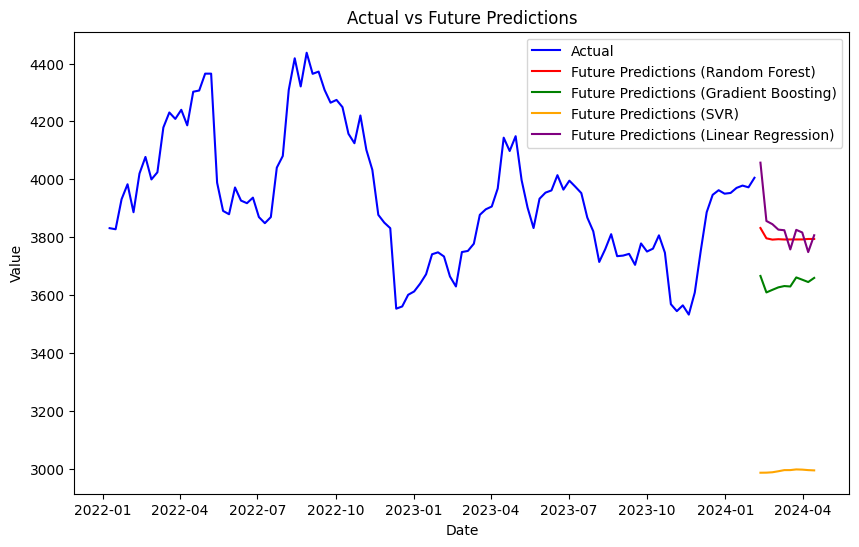

In [ ]:
from tqdm import tqdm

# Inverse transform the actual data for existing data
Y_test_inv = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Predict for future days
future_days = 10
future_dates = pd.date_range(start=dataset1.index[-1] + pd.Timedelta(days=7), periods=future_days, freq='W')

# Initialize lists to store future predictions for each model
future_predictions_rf = []
future_predictions_gb = []
future_predictions_svr = []
future_predictions_lr = []

# Use the last look_back data points to predict the next point, and then append it to input for next prediction
last_sequence = scaled_test_data[-look_back:, 0]

for i in tqdm(range(future_days)):
    # Predict using Random Forest model
    prediction_rf = rf_regressor.predict(last_sequence.reshape(1, -1))
    future_predictions_rf.append(prediction_rf[0])

    # Predict using Gradient Boosting model
    prediction_gb = gb_regressor.predict(last_sequence.reshape(1, -1))
    future_predictions_gb.append(prediction_gb[0])

    # Predict using Support Vector Regression model
    prediction_svr = svr_regressor.predict(last_sequence.reshape(1, -1))
    future_predictions_svr.append(prediction_svr[0])

    # Predict using Linear Regression model
    prediction_lr = linear_regressor.predict(last_sequence.reshape(1, -1))
    future_predictions_lr.append(prediction_lr[0])

    # Update last_sequence for the next prediction
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = prediction_rf[0]  # Using prediction from Random Forest as it's one of the models

# Inverse transform the predictions
future_predictions_rf = scaler.inverse_transform(np.array(future_predictions_rf).reshape(-1, 1)).flatten()
future_predictions_gb = scaler.inverse_transform(np.array(future_predictions_gb).reshape(-1, 1)).flatten()
future_predictions_svr = scaler.inverse_transform(np.array(future_predictions_svr).reshape(-1, 1)).flatten()
future_predictions_lr = scaler.inverse_transform(np.array(future_predictions_lr).reshape(-1, 1)).flatten()

# Plot the future predictions for each model
plt.figure(figsize=(10, 6))
plt.plot(dataset1.index[-len(Y_test_inv):], Y_test_inv, label='Actual', color='blue')
plt.plot(future_dates, future_predictions_rf, label='Future Predictions (Random Forest)', color='red')
plt.plot(future_dates, future_predictions_gb, label='Future Predictions (Gradient Boosting)', color='green')
plt.plot(future_dates, future_predictions_svr, label='Future Predictions (SVR)', color='orange')
plt.plot(future_dates, future_predictions_lr, label='Future Predictions (Linear Regression)', color='purple')
plt.title('Actual vs Future Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate MSE for each model
mse_rf = mean_squared_error(Y_test_inv[:future_days], future_predictions_rf)
mse_gb = mean_squared_error(Y_test_inv[:future_days], future_predictions_gb)
mse_svr = mean_squared_error(Y_test_inv[:future_days], future_predictions_svr)
mse_lr = mean_squared_error(Y_test_inv[:future_days], future_predictions_lr)

# Print MSE for each model
print("Mean Squared Error (Random Forest):", mse_rf)
print("Mean Squared Error (Gradient Boosting):", mse_gb)
print("Mean Squared Error (SVR):", mse_svr)
print("Mean Squared Error (Linear Regression):", mse_lr)


Mean Squared Error (Random Forest): 44328.59110308732
Mean Squared Error (Gradient Boosting): 122544.32314648286
Mean Squared Error (SVR): 978040.8646426208
Mean Squared Error (Linear Regression): 46882.39088537266
